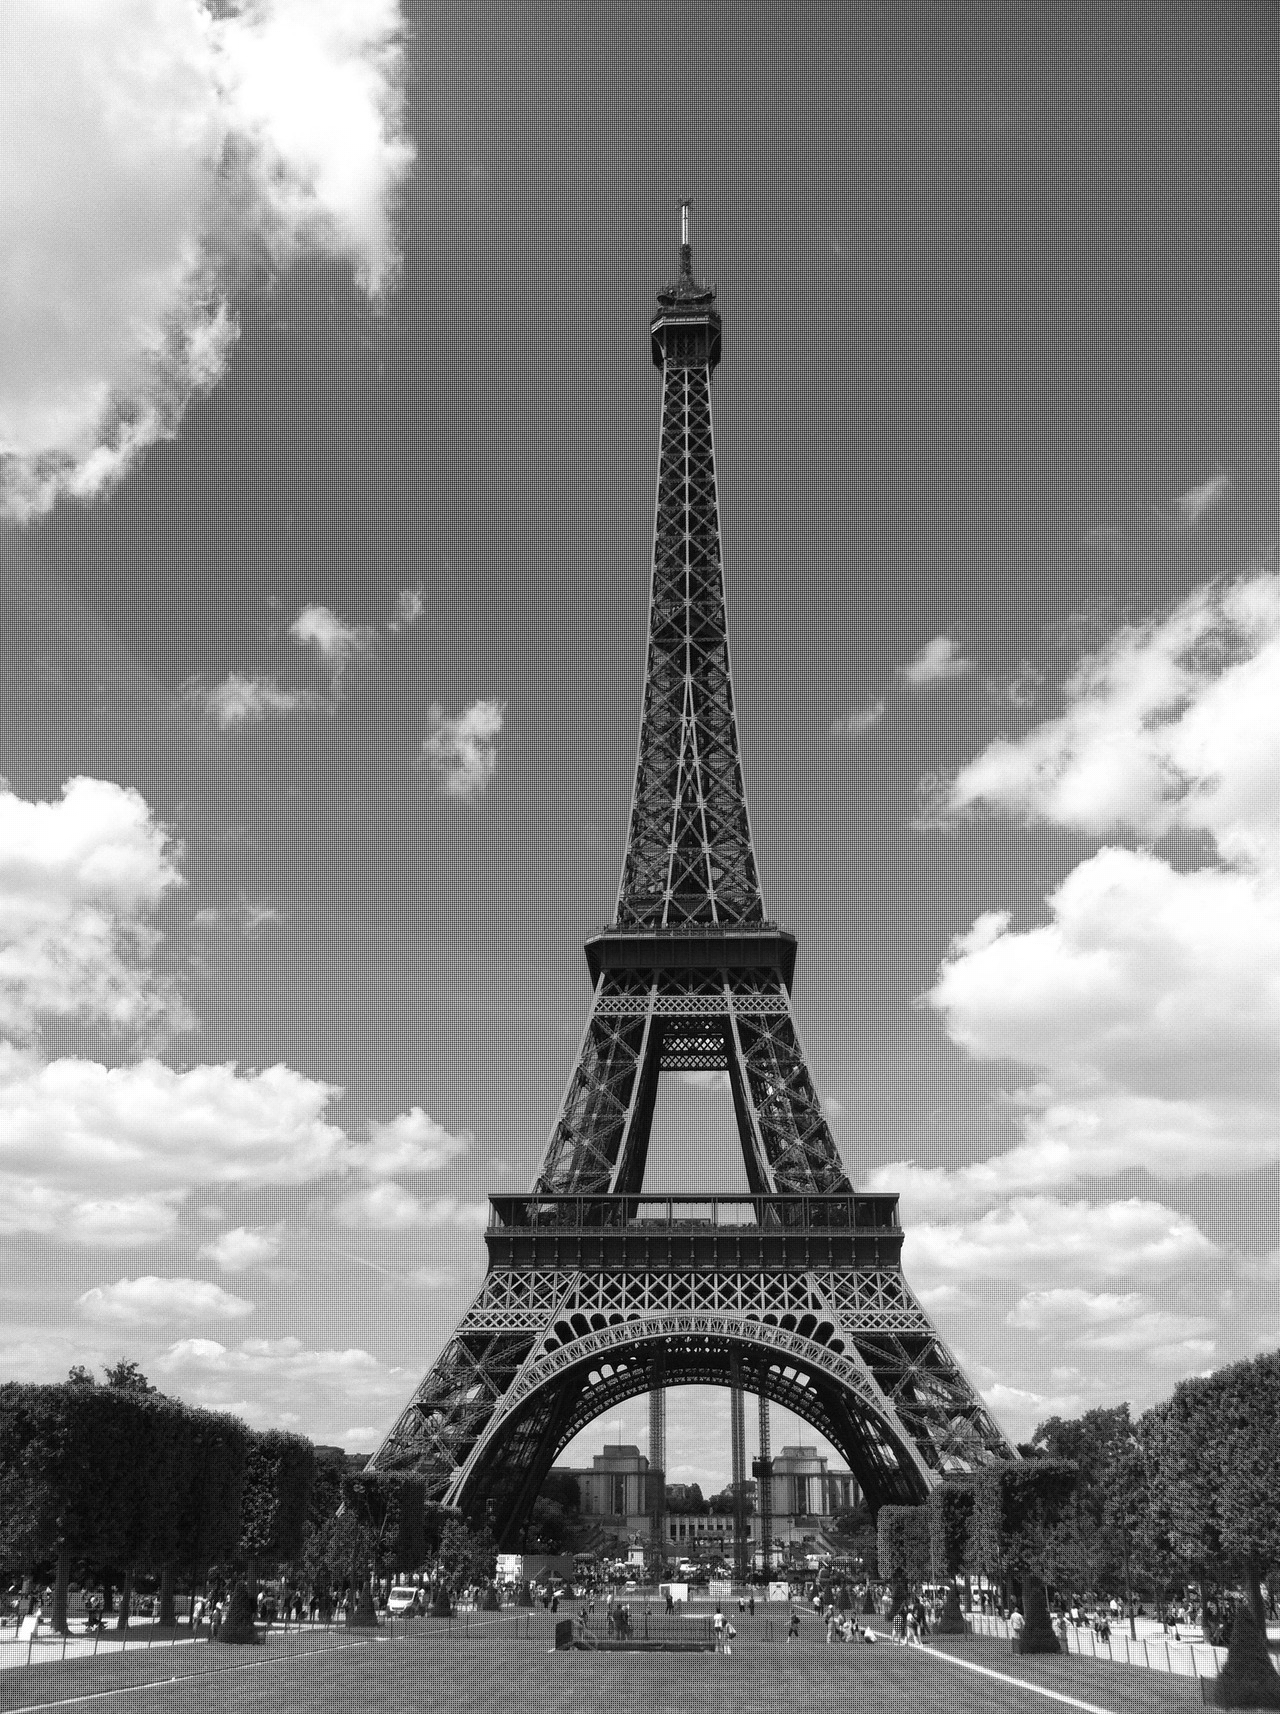

In [2]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def convert_to_tetra_cfa(rgb_image):
    height, width, _ = rgb_image.shape
    tetra_cfa_image = np.zeros((height, width), dtype=np.uint8)

    tetra_cfa_image[::2, ::2] = rgb_image[::2, ::2, 2]  # Red pixels
    tetra_cfa_image[1::2, ::2] = rgb_image[1::2, ::2, 1]  # Green pixels in odd rows
    tetra_cfa_image[::2, 1::2] = rgb_image[::2, 1::2, 1]  # Green pixels in even columns
    tetra_cfa_image[1::2, 1::2] = rgb_image[1::2, 1::2, 0]  # Blue pixels

    return tetra_cfa_image

# Load the RGB image
rgb_image_path = '/content/wonder3.jpg'
rgb_image = cv2.imread(rgb_image_path)

if rgb_image is not None:
    # Convert the RGB image to Tetra pattern CFA
    tetra_cfa_image = convert_to_tetra_cfa(rgb_image)

    # Display the Tetra pattern CFA image
    cv2_imshow(tetra_cfa_image)
else:
    print("Error loading the RGB image. Please check the file path.")

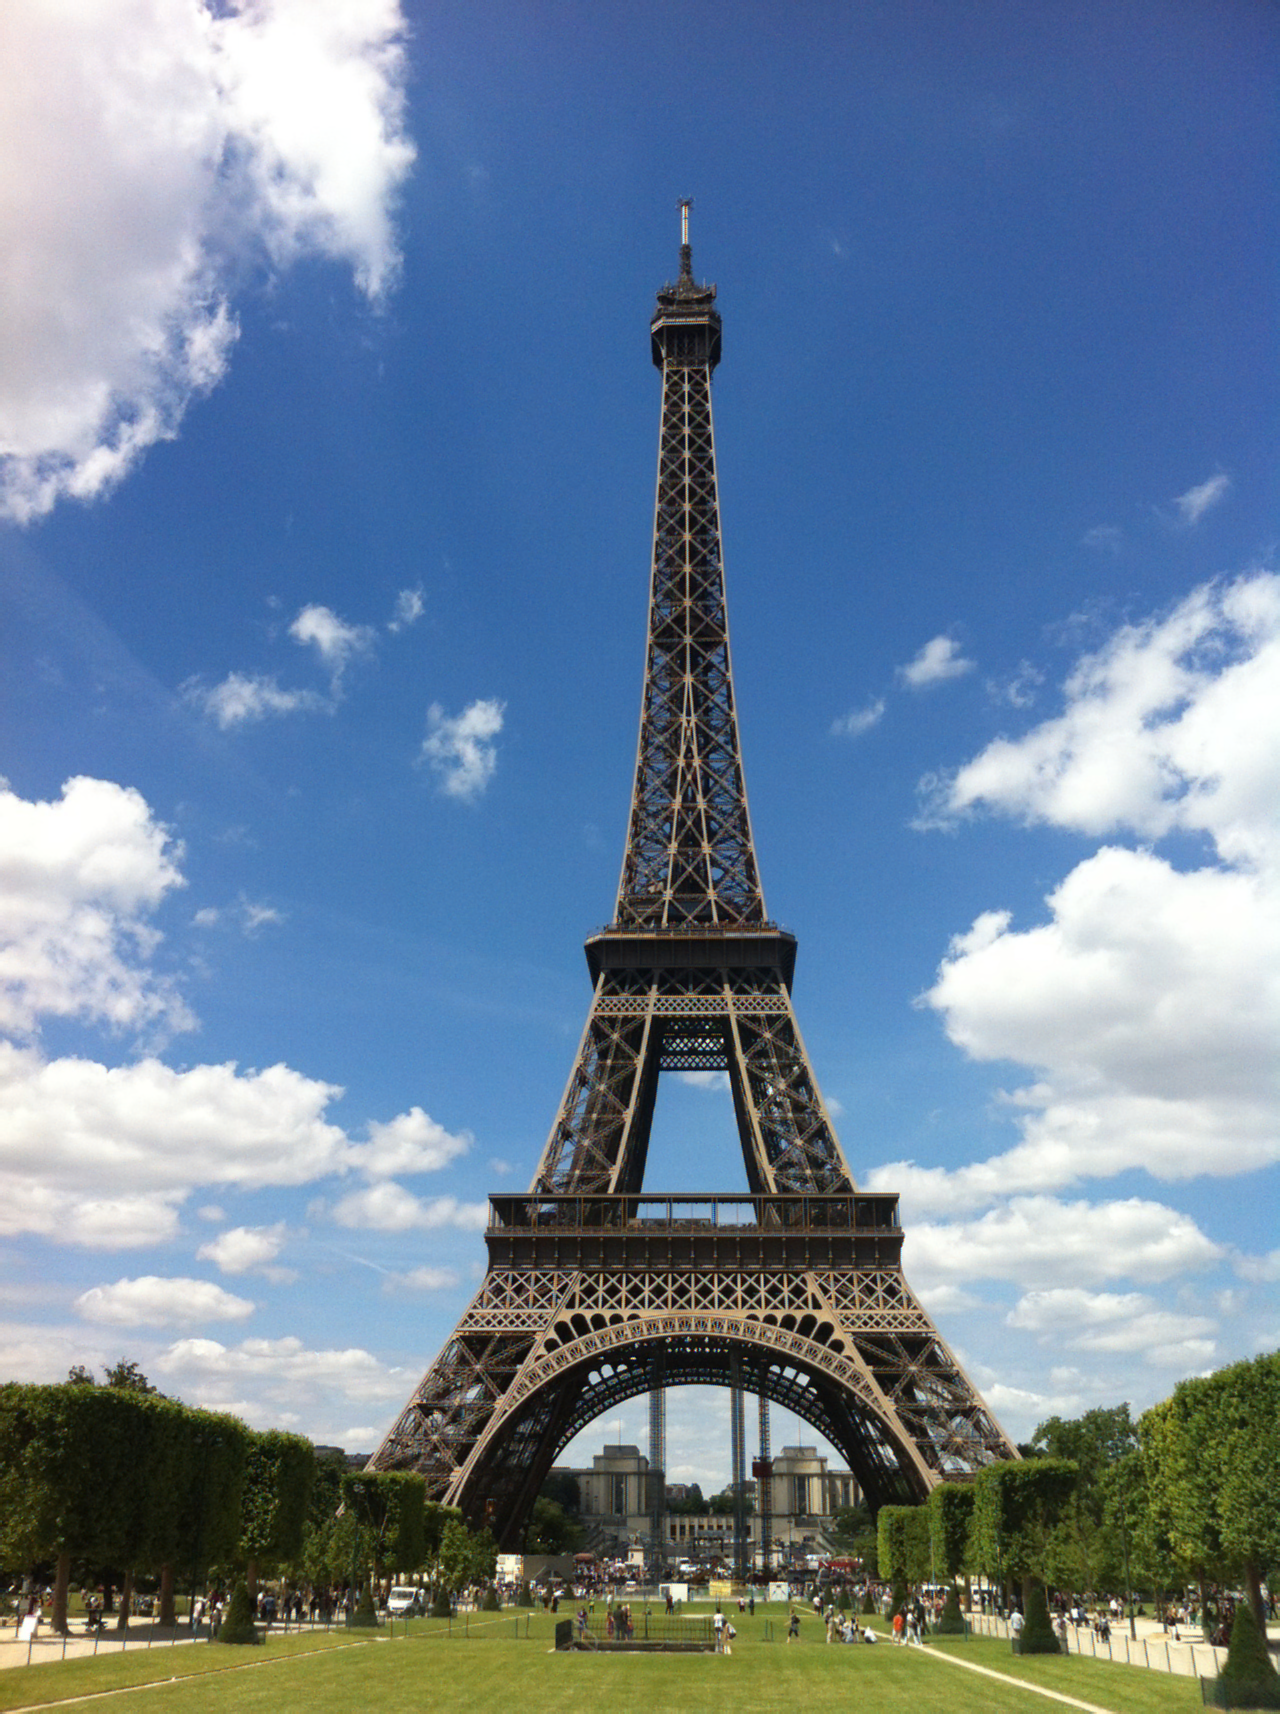

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def reconstruct_rgb_from_tetra_cfa_lmmse(tetra_cfa_image):
    rgb_image = cv2.cvtColor(tetra_cfa_image, cv2.COLOR_BayerBG2BGR)

    return rgb_image

# Load the Tetra pattern CFA image
tetra_cfa_image_path = '/content/TETRA_CFA.png'
tetra_cfa_image = cv2.imread(tetra_cfa_image_path, cv2.IMREAD_GRAYSCALE)

if tetra_cfa_image is not None:
    # Reconstruct the RGB image from Tetra pattern CFA using LMMSE demosaicing
    rgb_image_reconstructed_lmmse = reconstruct_rgb_from_tetra_cfa_lmmse(tetra_cfa_image)

    # Display the reconstructed RGB image using cv2_imshow
    cv2_imshow(rgb_image_reconstructed_lmmse)
else:
    print("Error loading the Tetra pattern CFA image. Please check the file path.")